In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Life_Expectancy_Data.csv")
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [4]:
data.shape

(2938, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality',
                          'infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp',
                          'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp',
                          'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9',
                          'Income composition of resources':'Income_composition_resources'}, inplace=True)

In [9]:
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool>

In [10]:
data.isna().sum()

Country                           0
Year                              0
Status                            0
Life_Expectancy                  10
Adult_Mortality                  10
Infant_Deaths                     0
Alcohol                         194
Percentage_Exp                    0
Hepatitis_B                     553
Measles                           0
BMI                              34
under_five_deaths                 0
Polio                            19
Total_Exp                       226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness_1_to_19                 34
thinness_5_to_9                  34
Income_composition_resources    167
Schooling                       163
dtype: int64

In [11]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

Country                         0
Year                            0
Status                          0
Life_Expectancy                 0
Adult_Mortality                 0
Infant_Deaths                   0
Alcohol                         0
Percentage_Exp                  0
Hepatitis_B                     0
Measles                         0
BMI                             0
under_five_deaths               0
Polio                           0
Total_Exp                       0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness_1_to_19                0
thinness_5_to_9                 0
Income_composition_resources    0
Schooling                       0
dtype: int64

Here are some assumptions and things to consider when doing regression analysis:
1.	Linearity: the effect of each independent variable on the dependent variable is constant across the range of values for that variable.
2.	Homoscedasticity: is that the variance of the errors (residuals) is constant across all levels of the independent variables.  
3.	Normality: the distribution of the residuals should be symmetric and bell-shaped.
4.	Outliers and influential points: it's important to identify and deal with outliers and influential points appropriately.
5.	Multicollinearity: occurs when two or more independent variables are highly correlated with each other.  

In [ ]:
It is important to assess whether the relationship between the dependent variable and the independent variables is linear or non-linear in regression analysis. 
This is because different regression models are better suited for capturing different types of relationships. To identify whether the relationship between the input variables and the target variable is linear or non-linear, we can use various methods of data visualization and exploratory data analysis.
1. Scatter plots: can be used to visualize the relationship between two variables. 
2. Correlation matrix: can be used to visualize the correlation between all pairs of variables in the dataset.
3. Residual plots: can be used to visualize the difference between the predicted values and the actual values. 
4. Non-parametric tests: the Spearman rank correlation test or the Kendall rank correlation test, can be used to test for the presence of non-linear relationships between variables. These tests are useful when the relationship between the variables is not easily modeled using a linear function.
If the points on the scatter plot form a straight line, then the relationship is likely to be linear. If the points form a curve or some other non-linear pattern, then the relationship is likely to be non-linear.
If the correlation between the input variables and the target variable is high and positive or negative, then the relationship is likely to be linear. If the correlation is low or non-existent, then the relationship may be non-linear.
If the residual plot shows a random pattern around zero, then the relationship is likely to be linear. If the residual plot shows a pattern that is not random, such as a curve or a funnel shape, then the relationship may be non-linear.


In [12]:
# 1. Linearity
# Check the correlation between the independent and dependent variables
corr_matrix = data.corr()
print(corr_matrix['Life_Expectancy'])

Year                            0.169623
Life_Expectancy                 1.000000
Adult_Mortality                -0.696359
Infant_Deaths                  -0.196535
Alcohol                         0.391598
Percentage_Exp                  0.381791
Hepatitis_B                     0.203771
Measles                        -0.157574
BMI                             0.559255
under_five_deaths              -0.222503
Polio                           0.461574
Total_Exp                       0.207981
Diphtheria                      0.475418
HIV/AIDS                       -0.556457
GDP                             0.430493
Population                     -0.019638
thinness_1_to_19               -0.472162
thinness_5_to_9                -0.466629
Income_composition_resources    0.692483
Schooling                       0.715066
Name: Life_Expectancy, dtype: float64


If the correlation between the input variables and the target variable is high and positive or negative, then the 
relationship is likely to be linear. If the correlation is low or non-existent, then the relationship may be non-linear. As seen from the result the attributes have relationship which signify the data is linear.

<Axes: >

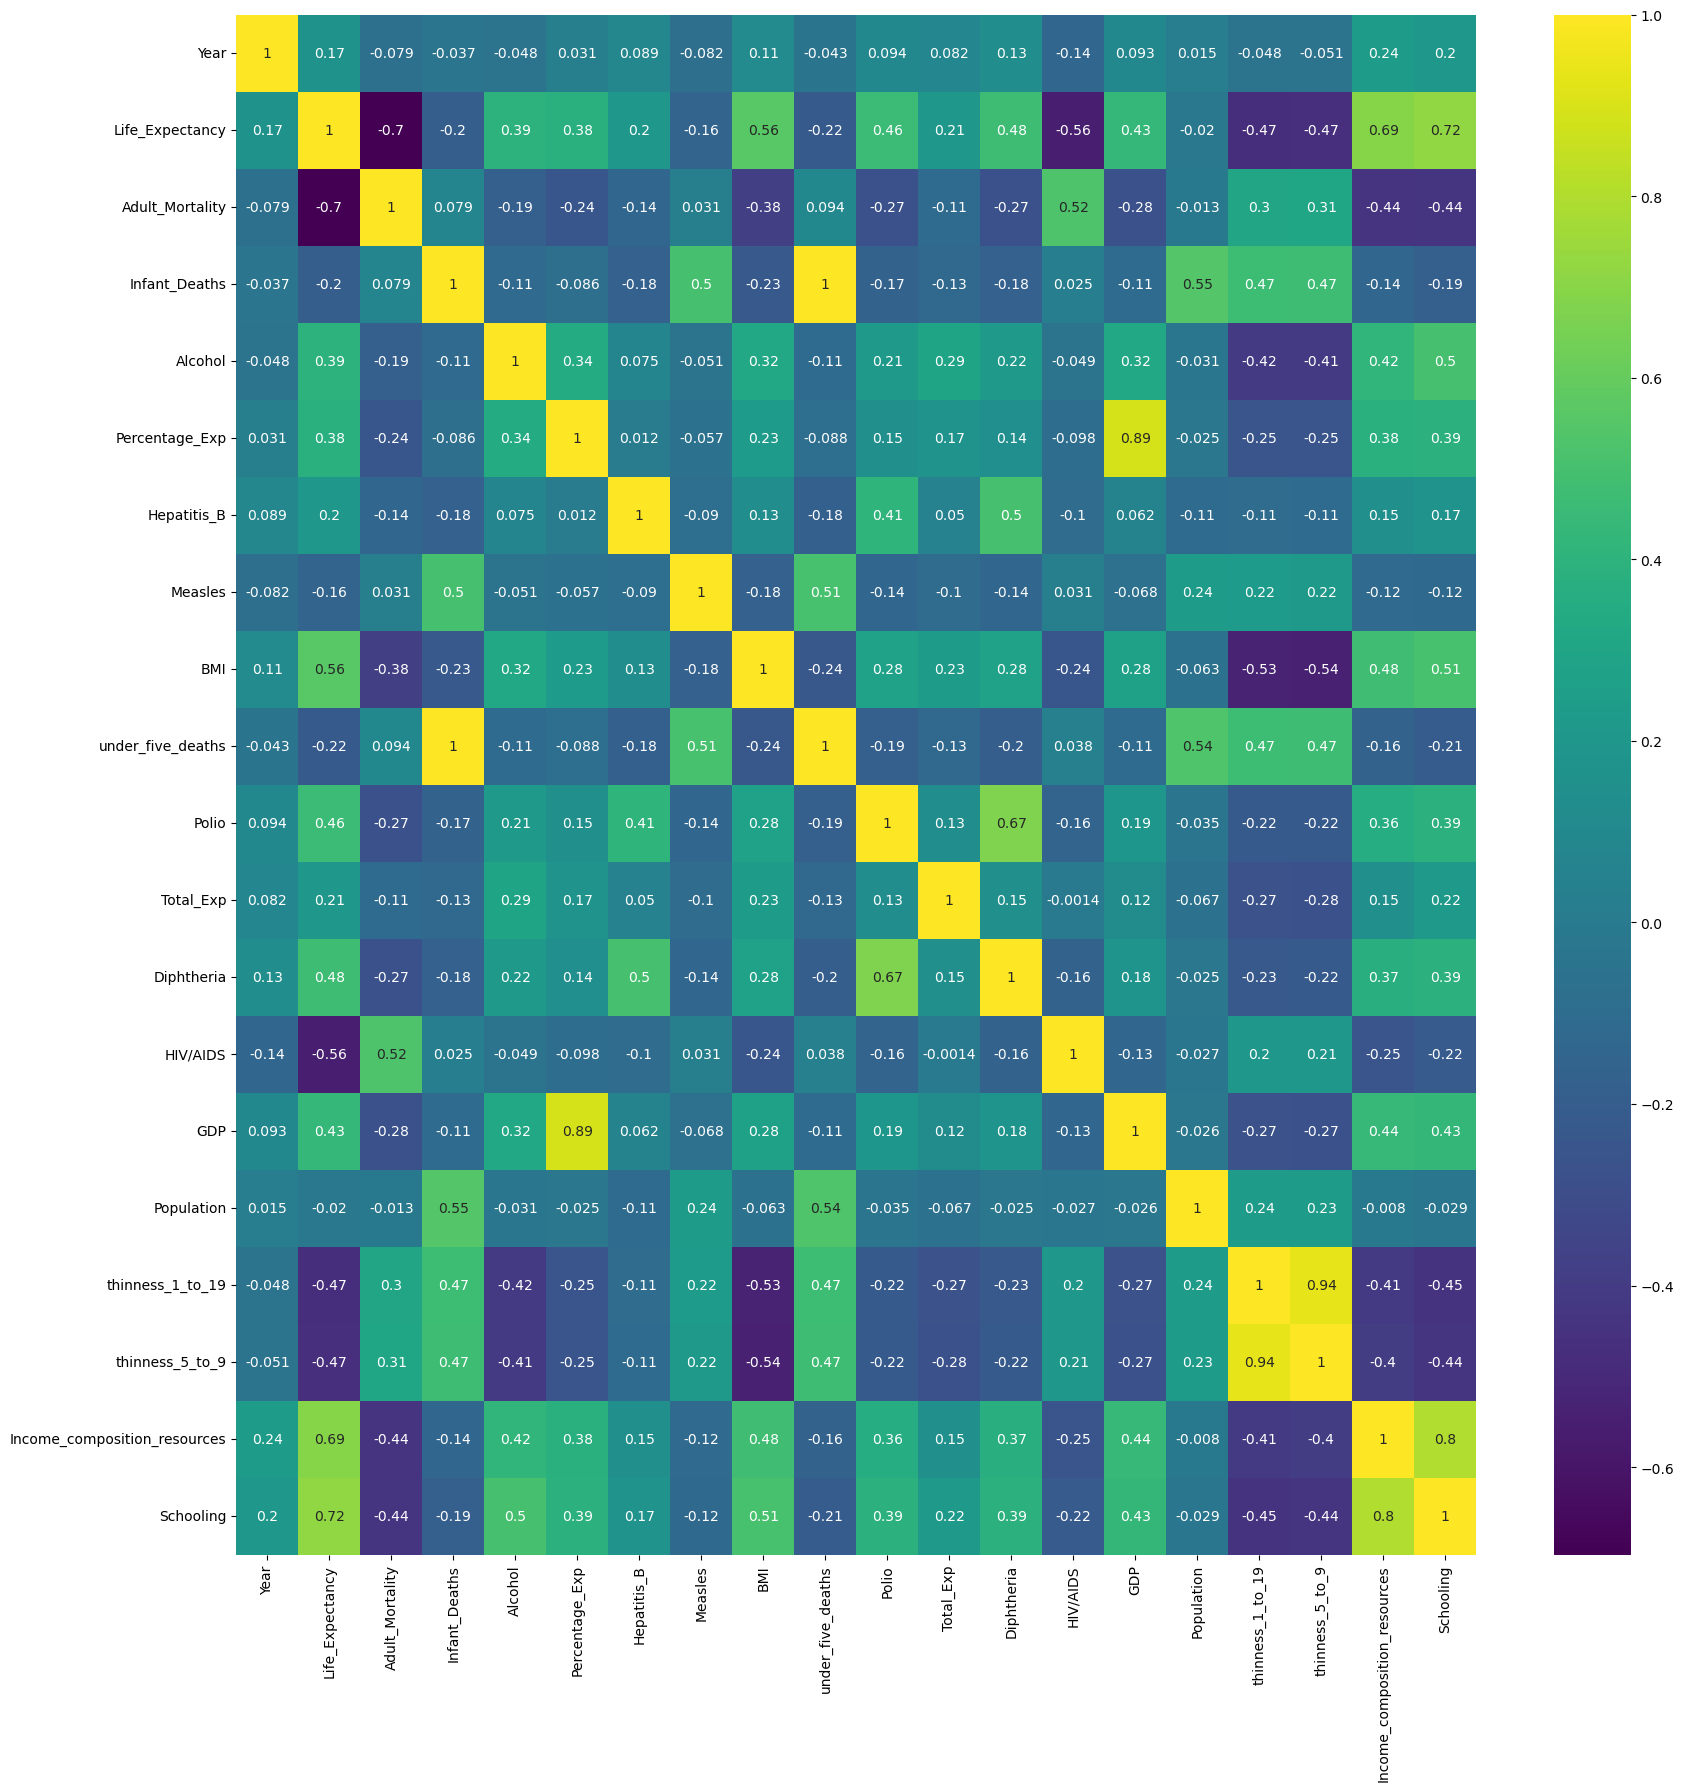

In [21]:
fig, ax = plt.subplots(figsize = (20,20)) 
corr = data.corr() 
sns.heatmap(corr, cmap= 'viridis', annot = True) 

The following features are highly correlated:
Under_5_deaths <---> Infant_Deaths. 
Thinness 5-9 <---> Thinness 1-19. 

In [14]:
independent_variables_1 = ['GDP', 'Schooling', 'Population'] 
independent_variables_2= ['Adult_Mortality','Infant_Deaths','under_five_deaths']
independent_variables_3= ['Hepatitis_B','Measles','Polio','Diphtheria','HIV/AIDS','Alcohol']
independent_variables_4= ['Total_Exp','Percentage_Exp','Income_composition_resources']
independent_variables_5= ['BMI','thinness_1_to_19','thinness_5_to_9']
target_variable = 'Life_Expectancy'
def plot_scatter(independent_vars):
    for var in independent_vars:
        plt.scatter(data[var], data[target_variable])
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.show()

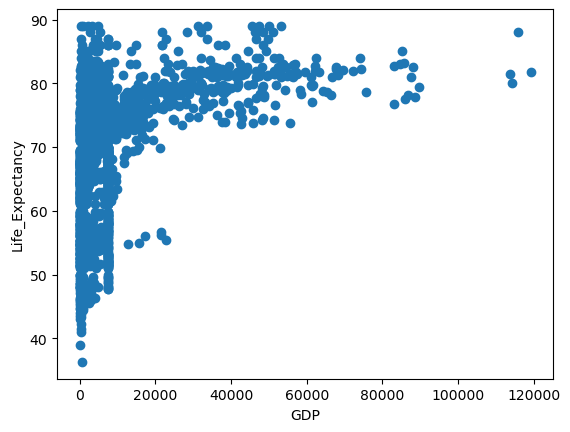

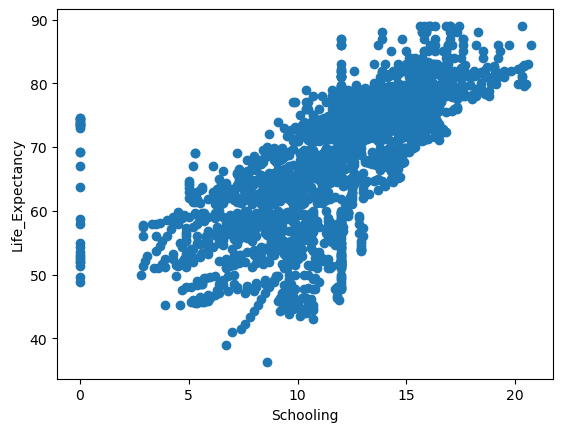

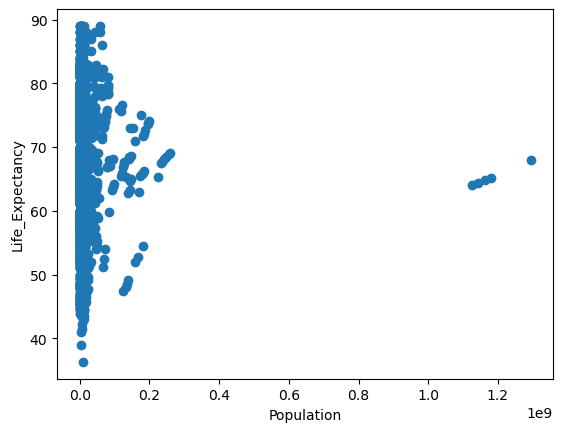

In [15]:
plot_scatter(independent_variables_1)

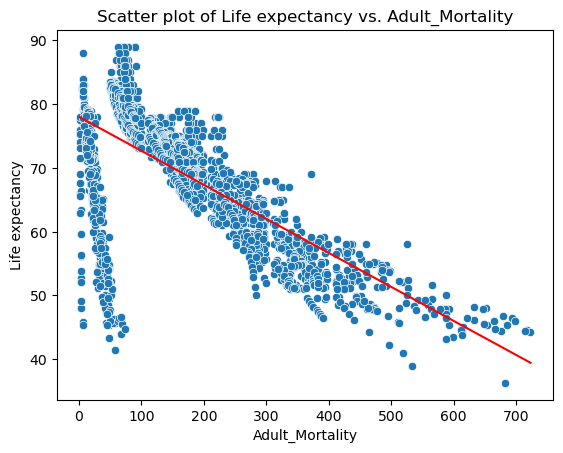

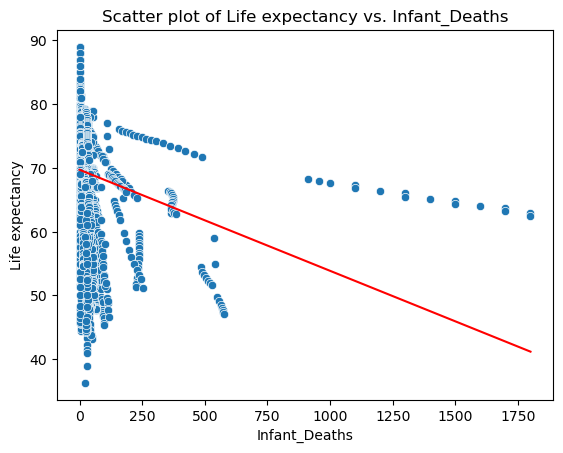

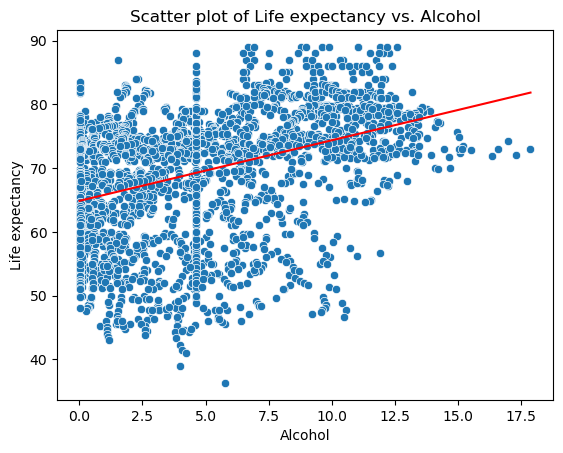

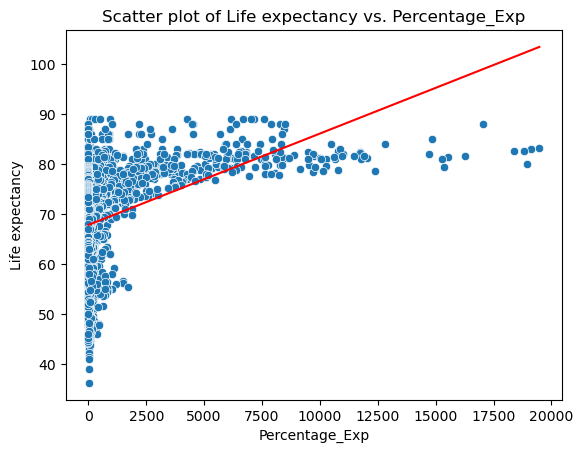

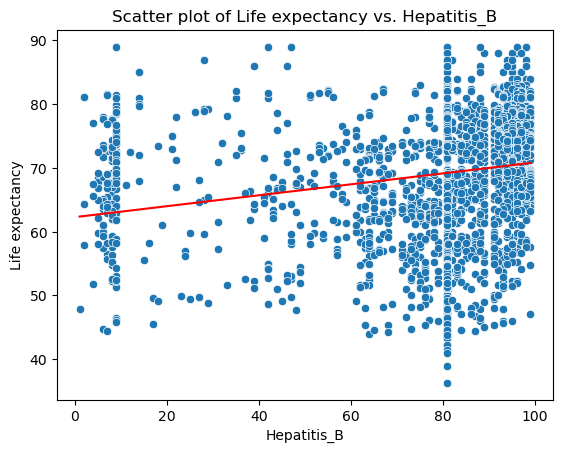

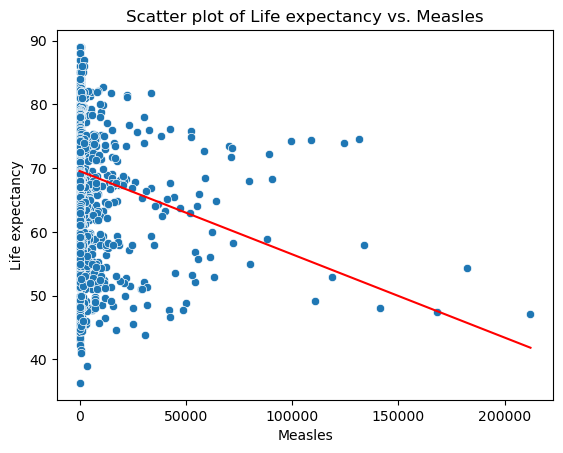

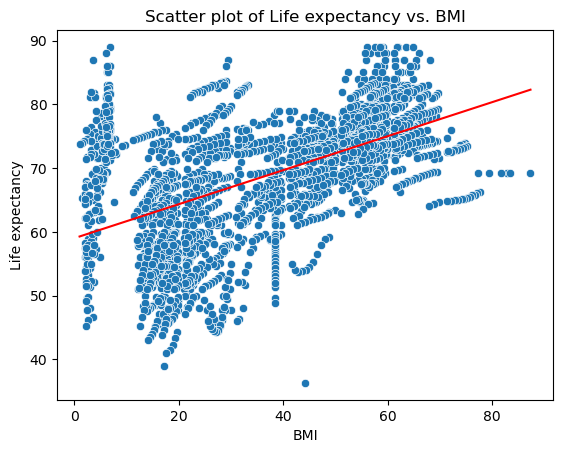

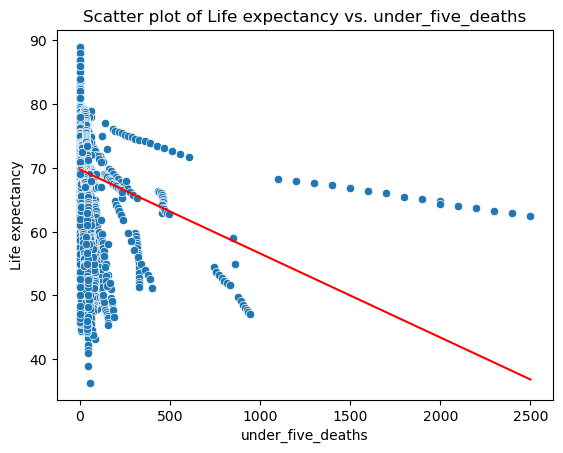

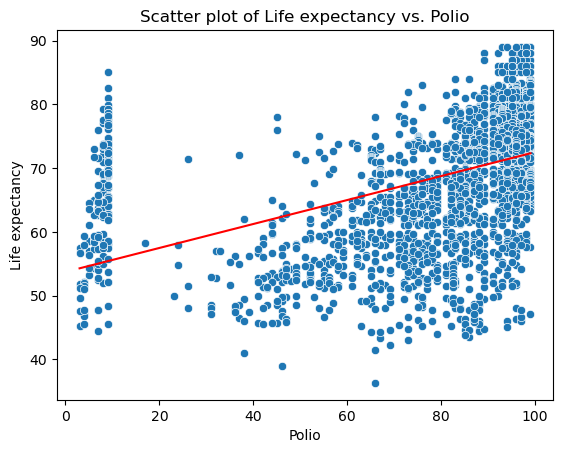

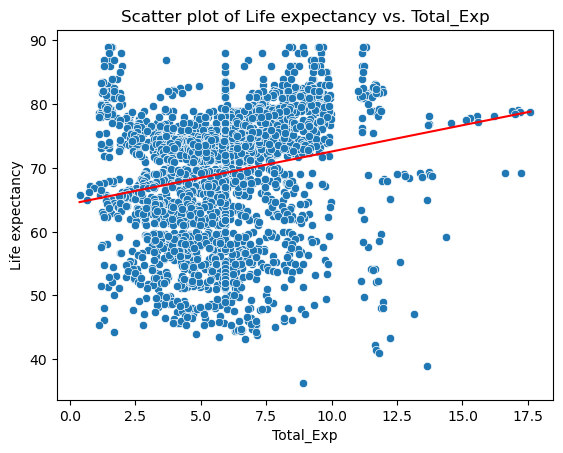

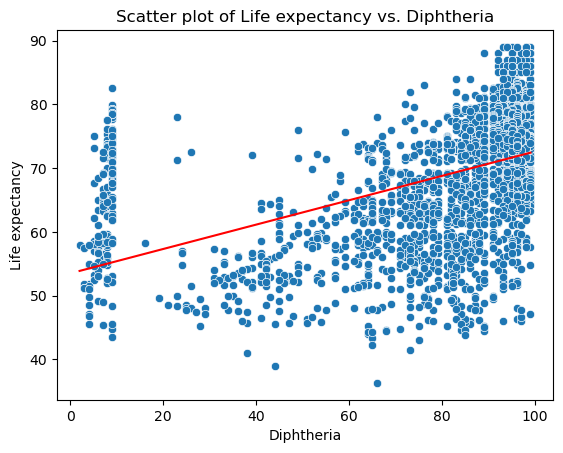

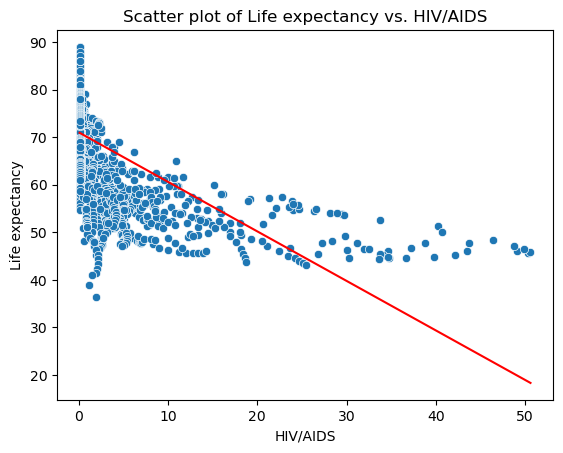

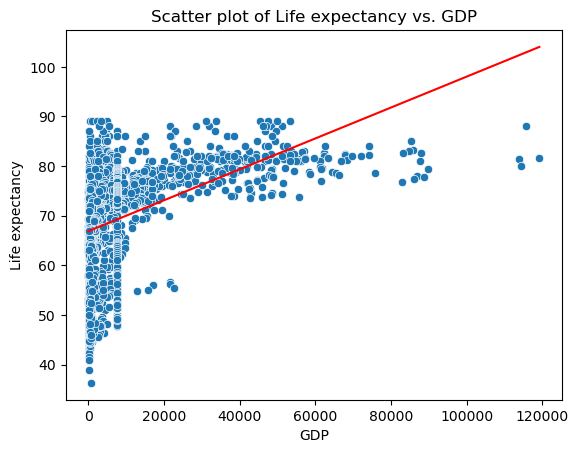

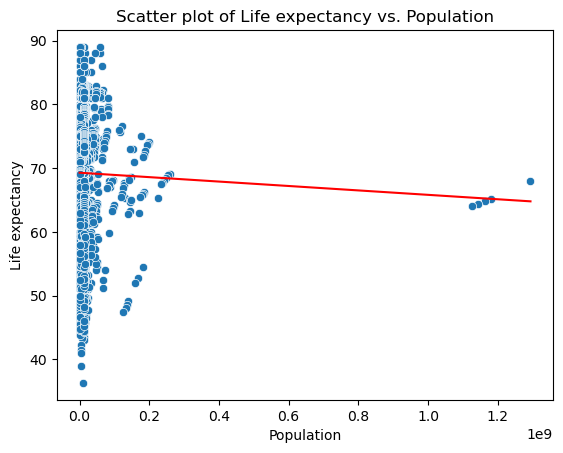

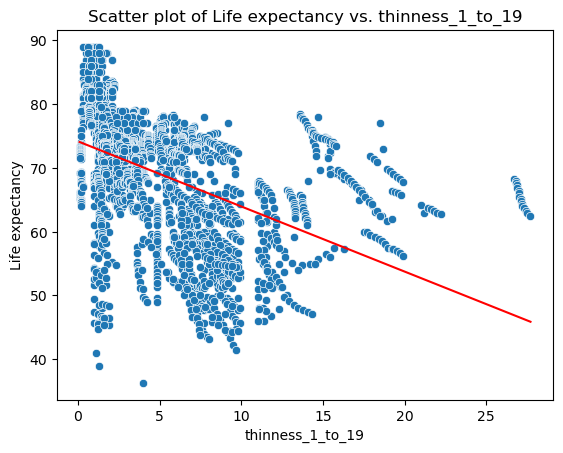

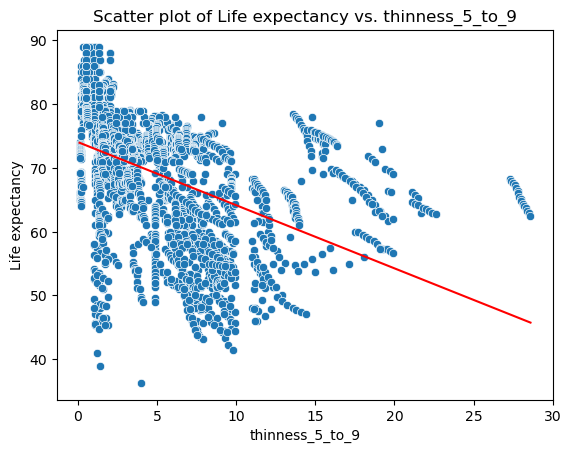

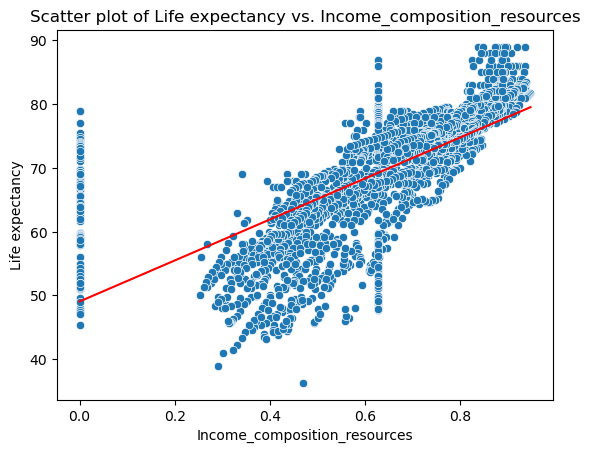

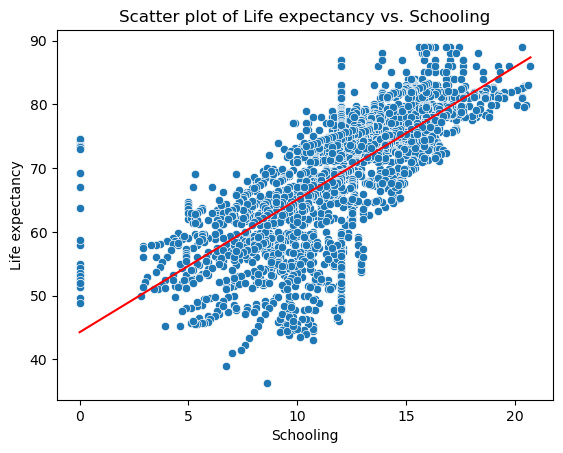

In [18]:
from scipy.stats import linregress
data_plot= data.drop(columns=['Country','Year','Status'])
def scatterplot_with_regression(x, y):
    sns.scatterplot(x=x, y='Life_Expectancy', data=data_plot)
    slope, intercept, r_value, p_value, std_err = linregress(data_plot[x], data_plot['Life_Expectancy'])
    x_range = np.linspace(data_plot[x].min(), data_plot[x].max(), 100)
    y_range = slope * x_range + intercept
    plt.plot(x_range, y_range, color='r')
    plt.xlabel(x)
    plt.ylabel('Life expectancy')
    plt.title(f'Scatter plot of Life expectancy vs. {x}')
    plt.show()

# Loop over all independent variables and create scatter plots with life expectancy on the y-axis
for col in data_plot.columns:
    if col != 'Life_Expectancy':
        scatterplot_with_regression(col, 'Life_Expectancy')

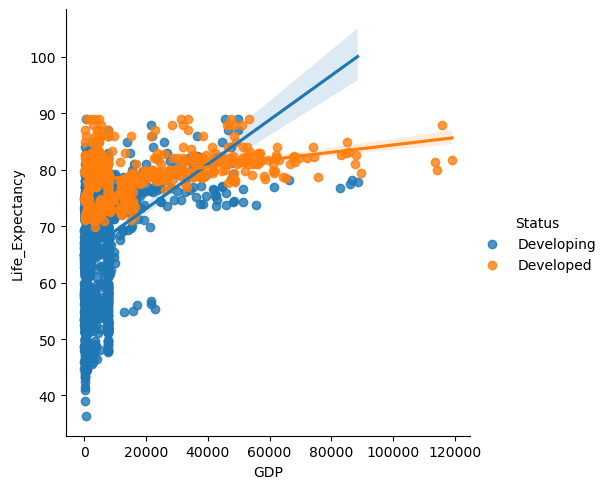

In [16]:
# Plot a scatter plot with the line of best fit
sns.lmplot(x='GDP', y='Life_Expectancy', hue='Status', data=data)